In [72]:
# Import and configure modules
# Scikit-learn                  # for non deep machine learning methods
import sys
import numpy as np                      # for data storage & manipulation
import pickle
import pandas as pd                     # for data parsing & manipulation
import math
import os, cv2, glob
import argparse
import pandas as pd
import tensorflow as tf             # for deep learning
from matplotlib import pyplot as plt    # for plotting
from collections import Counter


In [19]:
#Set paths
db_dir = "/mnt/home/n10203478/EGH400/database/"
db_dir = "../../../database"
p2p_dir = "../../../CrowdCounting-P2PNet/"

In [20]:
with open(os.path.join(db_dir,"train_gt.txt")) as load_file:
    train_set = [tuple(line.split()) for line in load_file]

with open(os.path.join(db_dir,"test_gt.txt")) as load_file:
    test_set = [tuple(line.split()) for line in load_file]

Text(0.75, -0.05, 'b) Validation Set')

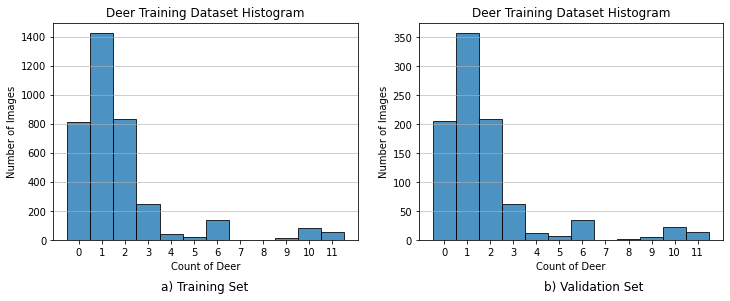

In [75]:
#TRAINING & TESTING SET HISTOGRAM
def column(matrix, i):
    return [row[i] for row in matrix]

train_test = [train_set,test_set]

fig=plt.figure(figsize=[12,4])
for i in range(2):
    values = list(map(int,(column(train_test[i],1))))
    hist, bin_edges = np.histogram(values, 12, range=(0, 12))
    width = (bin_edges[1] - bin_edges[0])

    ax=fig.add_subplot(1, 2, i+1)
    plt.setp(ax, xticks=list(set(values)))
    plt.grid(axis='y', alpha=0.75)
    plt.bar(bin_edges[:-1], hist, align='center', width=width, edgecolor='k', alpha=0.8)
    plt.title('Deer Training Dataset Histogram')
    plt.xlabel('Count of Deer')
    plt.ylabel('Number of Images')

plt.figtext(0.3, -0.05, "a) Training Set", wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(0.75, -0.05, "b) Validation Set", wrap=True, horizontalalignment='center', fontsize=12)

In [76]:
# Display counts - don't need to run
c_test = Counter(elem[1] for elem in test_set)
c_train = Counter(elem[1] for elem in train_set)
for i in range(12):
    print("{}:".format(str(i)), c_train[str(i)], c_test[str(i)])
    # print("Yes:", c['1'])
    # print("No:", c['0'])

0: 815 205
1: 1424 357
2: 832 209
3: 250 63
4: 45 12
5: 25 7
6: 140 36
7: 3 1
8: 4 2
9: 18 5
10: 87 23
11: 59 15


In [6]:
# Store filename, gt count, and image for each .png in test set
test_array=[]
for file in glob.glob(os.path.join(db_dir,"test/*.png")): 
    img = cv2.imread(file)
    filename = os.path.basename(file)#.split(".")[0]    
    pre = filename.split(".")[0]    
    
    for line in test_set:
        if line[0] == filename:
            count = line[1]
            test_array.append(tuple([pre,count,img]))   

len(test_array)

In [77]:
# #CAN SKIP
# #obtain p2pnet output pred imgs and pred count
# p2pout=[]
# for file in glob.glob("./run1/train/*.jpg"): 
#     filename = os.path.basename(file).split(".")[0]     
#     img_name = filename.split("pred")[0]   
#     if img_name in fnames:
#             img = cv2.imread(file)
#             pred = filename.split('pred')[1]
#             p2pout.append((img_name, img, pred))
#             print(img_name, pred)

# #alternatively, obtain p2p prediction from txt file.
# for rpm in fnames:
#     for line in open(pr_train_path,'r'):
#         if rpm in line:
#             print(line)

In [52]:
# #obtain all p2pnet output pred imgs and pred count
# p2pout_all=[]
# for file in glob.glob("./run1/test/*.jpg"): 
#     filename = os.path.basename(file).split(".")[0]     
#     img_name = filename.split("pred")[0] + ".png"
#     img = cv2.imread(file)

#     pred = filename.split('pred')[1]
#     p2pout_all.append((img_name, img))
#     # print(img_name, pred)

In [78]:
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

[314 555 415 694 313 627 515 852]


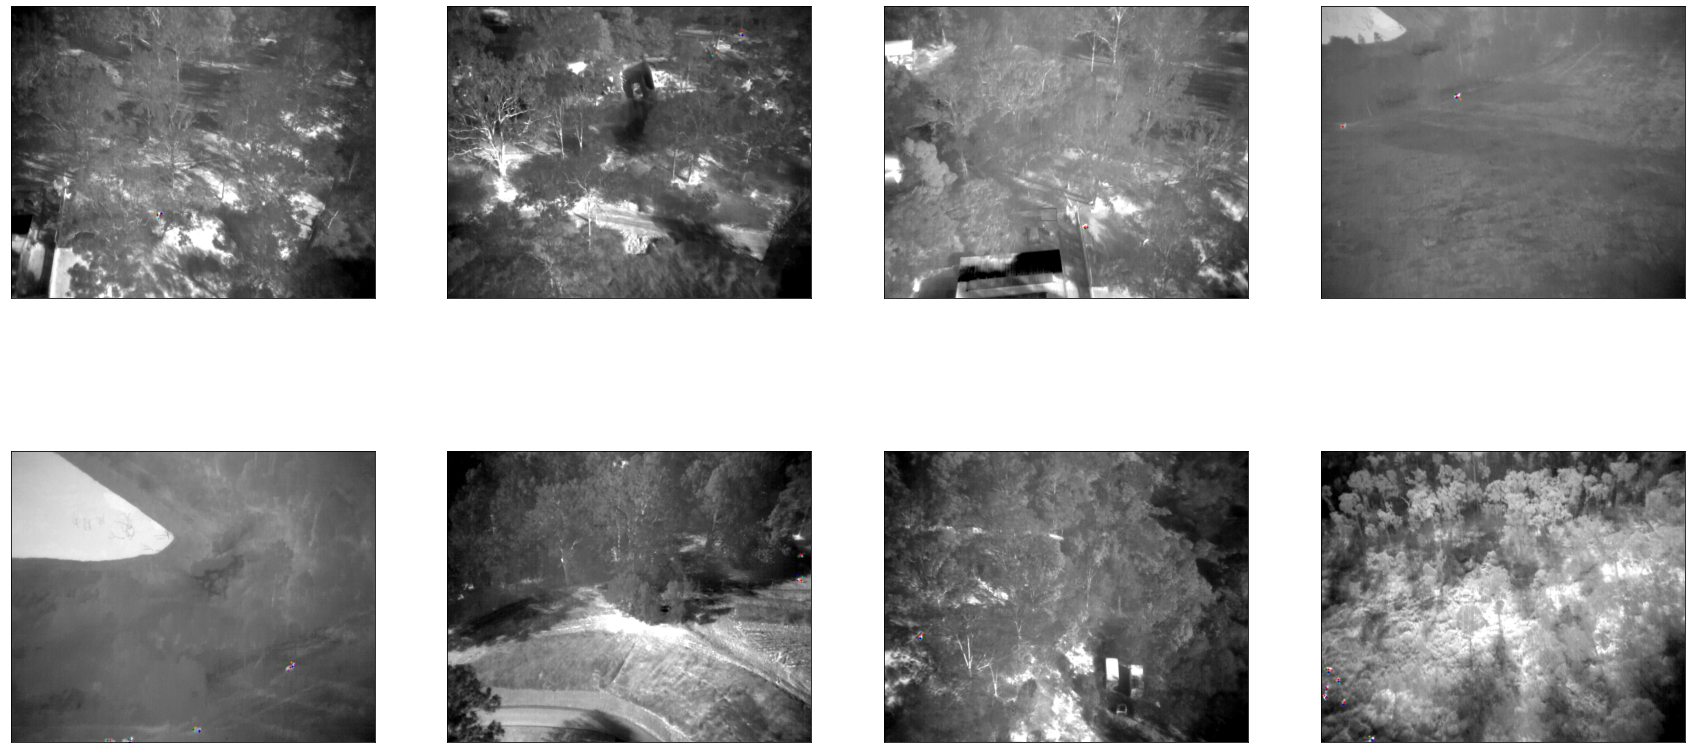

In [16]:
num = 8
randnums= np.random.randint(300,len(test_array),num)
colors = ['c','m','g','tab:orange','b']

print(randnums)
fig = plt.figure(figsize=[30, 15])
for i in range(num):
    x = randnums[i]
    pts=[]
    # points1_pth = find(test_array[x][0]+".txt","../../koaladetection/CrowdCounting-P2PNet/vis/testest2")
    for z in range(5): 
        pts_path = (os.path.join(p2p_dir,"vis","run_"+str(z+1),test_array[x][0]+'.txt'))

        with open(pts_path) as load_file:
            pts.append([(line.split()) for line in load_file])
            
    gt_pth = os.path.join(db_dir,"test",test_array[x][0]+'.txt')

    with open(gt_pth) as load_file:
        gt_points = [(line.split()) for line in load_file]

    # draw the predictions
    img_to_draw = cv2.cvtColor((test_array[x][2]), cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(2, 4, i + 1) #<---------------
    # ax.imshow(cv2.cvtColor(test_array[x][2],cv2.COLOR_BGR2RGB))COLOR_RGB2BGR

    plt.setp(ax, xticks=[], yticks=[])
    # plt.imshow(img_to_draw)
    
    for z in range(5):
        for p in pts[z]:
            x = int(float(p[0])*640)
            y = int(float(p[1])*512)
            plt.scatter(x, y, c=colors[z], s=1)#cv2.circle(img_to_draw, (x,y), size, (0, 0, 255), -1) #RED

    for p in gt_points:
        x = int(float(p[1])*640)
        y = int(float(p[2])*512)
        plt.scatter(x, y, c='r', s=1)

    # plt.scatter(x=[0.95078125*640, 0.959375*640], y=[0.4111328125*512, 0.5*512], c='r', s=1)
    plt.imshow(img_to_draw)
    # ax.axis('off') 

# fig.subplots_adjust(hspace=0.0)
fig.savefig('TESTING4.png', dpi=450)

Plot point predictions from different trains

In [30]:
def plot_run_preds(k):
    # k = 820#820, randnums[0]#809
    size = 1

    # colors = ['c','m','g','tab:orange','b']
    colors = [[0, 255, 0], [0, 0, 255],[0, 255, 255],[255, 0, 255],[255, 255, 0]]

    # for img in test_array:
    gt_pth = os.path.join(db_dir,"test",test_array[k][0]+'.txt')

    pts = []
    img_to_draw = cv2.cvtColor((test_array[k][2]), cv2.COLOR_BGR2RGB)
    for i in range(5): 
        pts_path = (os.path.join(p2p_dir,"vis/run_"+str(i+1),test_array[k][0]+'.txt'))

        with open(pts_path) as load_file:
            pts.append([(line.split()) for line in load_file])

    for i in range(5): 
        for p in pts[i]:
            x = int(float(p[0])*640)
            y = int(float(p[1])*512)
            img_to_draw=cv2.circle(img_to_draw, (x, y), size, colors[i], -1)

    with open(gt_pth) as load_file:
        gt_points = [(line.split()) for line in load_file]

    for p in gt_points:
        x = int(float(p[1])*640)
        y = int(float(p[2])*512)
        img_to_draw=cv2.circle(img_to_draw, (x,y), size, (255, 0, 0), -1)

    fig = plt.figure(figsize=[8, 8])
    plt.imshow(img_to_draw)

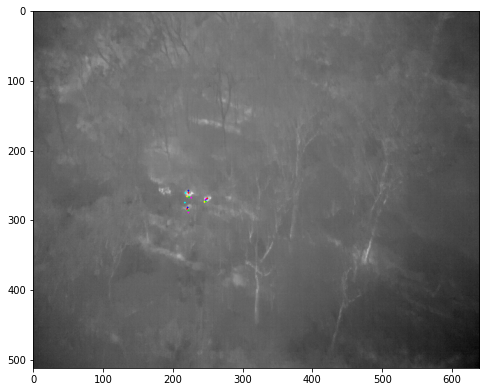

In [31]:
plot_run_preds(820)

DBSCAN

In [33]:
#import additional modules
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Gt count: 6
No. clusters: 5


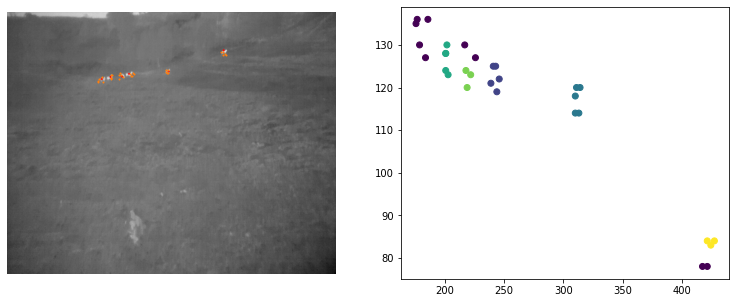

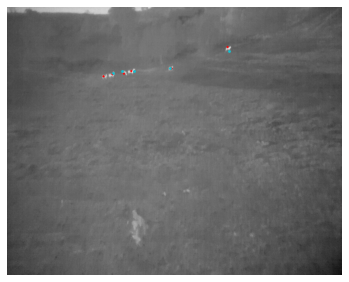

In [66]:
#e.g k = 860
k=860
eps = 5
min_samples = 3
pts = []
X = []

filename = test_array[k][0]+".png"
img_to_draw = cv2.cvtColor((test_array[k][2]), cv2.COLOR_BGR2RGB)
for i in range(5): 
    pts_path = (os.path.join(p2p_dir,"vis/run_"+str(i+1),test_array[k][0]+'.txt'))

    # print(pts_path)
    with open(pts_path) as load_file:
        pts.append([(line.split()) for line in load_file])

for i in range(5): 
    for p in pts[i]:
        x = int(float(p[0])*640)
        y = int(float(p[1])*512)
        X.append([x,y])
X = np.array(X)

gt_pth = os.path.join(db_dir,"test",test_array[k][0]+'.txt')


with open(gt_pth) as load_file:
    gt_points = [(line.split()) for line in load_file]

if X.size < 1:
    K=0
else:
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    ############## Find Cluster means #############
    labels = clustering.labels_# measure the performance of dbscan algo
    K = len(set(labels)) - (1 if -1 in labels else 0)

    means = np.array([X[labels == i].mean(axis=0) for i in range(0, K)])
    means = means.astype(int)

    ############# Plot Cluster means with gt co-ords #########
    img_to_draw = cv2.cvtColor((test_array[k][2]), cv2.COLOR_BGR2RGB)
        
    for p in gt_points:
        x = int(float(p[1])*640)
        y = int(float(p[2])*512)
        img_to_draw=cv2.circle(img_to_draw, (x,y), 2, (255, 0, 0), -1)

    fig = plt.figure(figsize=[20, 5])
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(img_to_draw)
    ax.scatter(X[:,0], X[:,1], s=1, c='tab:orange')
    ax.axis('off') 

    ax = fig.add_subplot(1, 3, 2)
    ax.scatter(X[:,0], X[:,1], c=clustering.labels_)
    ax.axis('on') 

    fig = plt.figure(figsize=[6, 6])
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(img_to_draw)
    # ax.scatter(X[:,0], X[:,1], s=2, c='tab:cyan')
    ax.scatter((np.array(means)[:,0]), (np.array(means)[:,1]), s=3, c='tab:cyan') #consensus detections
    # ax.scatter((means[:,0]), (means[:,1]), s=1, c='c') #consensus detections
    ax.axis('off') 

print("Gt count: {}".format(len(gt_points)))
print("No. clusters: {}".format(K))

    #evaluation metrics
    # sc = metrics.silhouette_score(X, clustering.labels_)
    # print("Silhouette Coefficient:%0.3f"%sc)


In [37]:
def cluster(k, eps, min_samples = 3):
    pts = []
    X = []

    filename = test_array[k][0]+".png"
    img_to_draw = cv2.cvtColor((test_array[k][2]), cv2.COLOR_BGR2RGB)
    for i in range(5): 
        pts_path = (os.path.join(p2p_dir,"vis/run_"+str(i+1),test_array[k][0]+'.txt'))
        # print(pts_path)
        with open(pts_path) as load_file:
            pts.append([(line.split()) for line in load_file])

    for i in range(5): 
        for p in pts[i]:
            x = int(float(p[0])*640)
            y = int(float(p[1])*512)
            X.append([x,y])
    X = np.array(X)

    if not X.size > 0:
        return[filename, 0]
     
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    ############## Find Cluster means #############
    labels = np.array(clustering.labels_)# measure the performance of dbscan algo
    K = len(set(labels)) - (1 if -1 in labels else 0)
    
    means = np.array([X[labels == i].mean(axis=0) for i in range(0, K)])
    means = means.astype(int)
        
    ############# Plot Cluster means with gt co-ords #########
    img_to_draw = cv2.cvtColor((test_array[k][2]), cv2.COLOR_BGR2RGB)

    with open(os.path.join(db_dir,'test',test_array[k][0]+".txt")) as load_file:
        gt_points = [(line.split()) for line in load_file]
        
    for p in gt_points:
        x = int(float(p[1])*640)
        y = int(float(p[2])*512)
        img_to_draw=cv2.circle(img_to_draw, (x,y), 2, (255, 0, 0), -1)

    return [filename, K] 

In [39]:
cluster_points=[]
# cluster(860, 5, min_samples = 3)
for m in range(len(test_set)):
    cluster_points.append(cluster(m, 5, min_samples = 3))

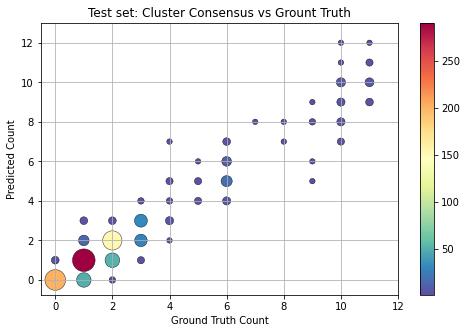

Accuracy: 18.962722852512158 %


In [56]:
#cluster test set
fig=plt.figure(figsize=[8,5])

gt_path=os.path.join(db_dir,"test_gt.txt")

gt_points = []
for line in test_set:
    filename = (line[0])
    count = int(line[1])
    gt_points.append([filename, count])

gt_points_sorted = sorted(gt_points, key=lambda tup: tup[0])
cluster_pts_sorted = sorted(cluster_points, key=lambda tup: tup[0])

test_x=column(gt_points_sorted, 1)
test_y=column(cluster_pts_sorted, 1) 
#Generate a list of unique points
points=list(set(zip(test_x,test_y))) 
#Generate a list of point counts
count=[len([x for x,y in zip(test_x,test_y) if x==p[0] and y==p[1]]) for p in points]
#Now for the plotting:
plot_x=[i[0] for i in points]
plot_y=[i[1] for i in points]
count=np.array(count)

ax=fig.add_subplot(1, 1, 1)
plt.xlim(-0.5, max(test_x)+1)
plt.ylim(-0.75, max(test_y)+1)
plt.scatter(plot_x,plot_y,c=count,s=30*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))
plt.colorbar()
plt.xlabel('Ground Truth Count')
plt.ylabel('Predicted Count')
plt.title("Test set: Cluster Consensus vs Grount Truth")
plt.grid()
plt.show()

g = zip(plot_x, plot_y, count)
g = list(sorted(g,key=lambda b: b[0]))
correct = 0
for j in range(len(g)):
    if tuple(g[j])[0]==tuple(g[j])[1]:
        correct+=(tuple(g[j])[2])
print("Accuracy: {} %".format(correct/len(train_set)*100))


P2PNet Model Train vs Test

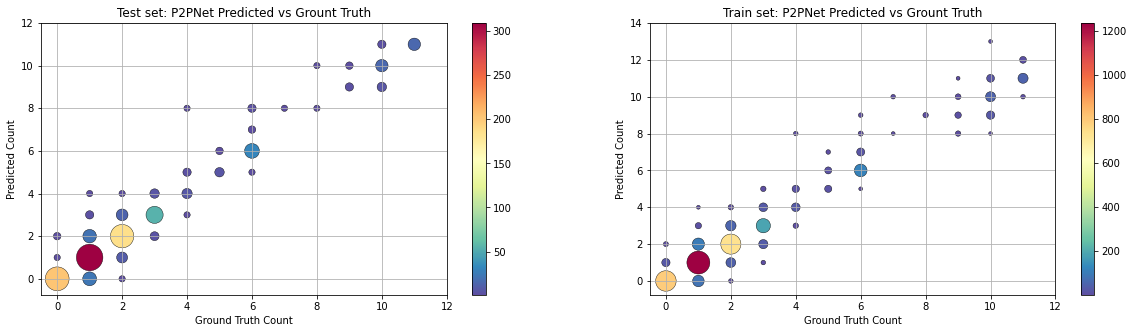

In [35]:
#https://stackoverflow.com/questions/32687826/how-can-i-account-for-identical-data-points-in-a-scatter-plot
pr_train_path = "./run1/train/p2p_train_pr.txt"
pr_test_path = "./run1/test/p2p_test_pr.txt"
g_names=["Test", "Train"]
gt_paths = (os.path.join(db_dir,"test_gt.txt"),os.path.join(db_dir,"train_gt.txt"))
p2p_pr_paths = (pr_test_path, pr_train_path)

fig=plt.figure(figsize=[20,5])

for x in range(2):
    gt_path=gt_paths[x]
    p2p_pr_path = p2p_pr_paths[x]

    p2p_pr_points = []
    with open(p2p_pr_path) as f_label:
        for line in f_label:
            stripped_line = line.strip().split(' ')
            filename = ((stripped_line[0])) 
            count = (float(stripped_line[1])) 
            p2p_pr_points.append([filename, count])

    gt_points = []
    with open(gt_path) as f_label:
        for line in f_label:
            stripped_line = line.strip().split(' ')
            filename = ((stripped_line[0])) 
            count = (float(stripped_line[1])) 
            gt_points.append([filename, count])

    gt_points_sorted = sorted(gt_points, key=lambda tup: tup[0])
    p2p_pr_points_sorted = sorted(p2p_pr_points, key=lambda tup: tup[0])

    test_x=column(gt_points_sorted, 1)
    test_y=column(p2p_pr_points_sorted, 1) #  I am just generating some test x and y values. Use your data here
    #Generate a list of unique points
    points=list(set(zip(test_x,test_y))) 
    #Generate a list of point counts
    count=[len([x for x,y in zip(test_x,test_y) if x==p[0] and y==p[1]]) for p in points]
    #Now for the plotting:
    plot_x=[i[0] for i in points]
    plot_y=[i[1] for i in points]
    count=np.array(count)

    ax=fig.add_subplot(1, 2, x+1)
    plt.xlim(-0.5, max(test_x)+1)
    plt.ylim(-0.75, max(test_y)+1)
    if x==0:
        plt.scatter(plot_x,plot_y,c=count,s=40*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))
    else:
        plt.scatter(plot_x,plot_y,c=count,s=15*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))
    plt.colorbar()
    plt.xlabel('Ground Truth Count')
    plt.ylabel('Predicted Count')
    plt.title(g_names[x]+ " set: P2PNet Predicted vs Grount Truth")
    plt.grid()
plt.show()

In [53]:
g = zip(plot_x, plot_y, count)
g = list(sorted(g,key=lambda b: b[0]))
# print(tuple(g))

correct = 0
for j in range(len(g)):
    if tuple(g[j])[0]==tuple(g[j])[1]:
        correct+=(tuple(g[j])[2])
correct/len(train_set)*100


20.529443544030254

IGNORE BELOW


In [613]:
#print full line if " 4\n" in line
# with open("val_gt.txt") as openfile:
#     for line in openfile:
#         if " 4\n" in line:
#         # if "hello" in line.lower():
#             print(line)

p2p_pr_path = "../../../CrowdCounting-P2PNet/p2p_train_pr.txt"


with open("train_gt.txt") as load_file:
    gt = [tuple(line.split()) for line in load_file]
with open(p2p_pr_path) as load_file:
    p2p_points = [tuple(line.split()) for line in load_file]

#set(gt_sorted)^set(p2p_sorted)
correct = list(set(sorted(gt))&set(sorted(p2p_points)))
len(correct)
for i in range(len(correct)-1):
    if correct[i][1] == '8':
        print(correct[i])


#Flight3_20190821_17615.png 11, Flight3_20190821_17698.png 8, 
#deer_26098.png 6, Flight3_20190821_17707.png6, deer_19779.png 4, Flight3_20190613_092054__02186.png (bad 4)

('Flight3_20190821_17698.png', '8')
('Flight3_20190821_17700.png', '8')


In [627]:
p2pimgs=[]
p2poutputs=[]
fnames = ['Flight1_20190820__03441','Flight3_20190613_091724_05720','Flight3_20190613_092210__01128']

for file in glob.glob("../../../CrowdCounting-P2PNet/vis/testing/*.jpg"): 
    filename = os.path.basename(file).split(".")[0]     
    testdd = filename.split("pred")[0]   
    if testdd in fnames:
            img = cv2.imread(file)
            pred = filename.split('pred')[1]
            #plt.imshow(img)
            p2pimgs.append(img)
            p2poutputs.append(pred)
            print(filename,testdd, pred)

for file in glob.glob("../../../DATA_ROOT/test/scene01/*.png"): 
    filename = os.path.basename(file).split(".")[0]     
    testdd = filename.split("pred")[0]   
    if testdd in fnames:
            img = cv2.imread(file)
            #plt.imshow(img)
            p2pimgs.append(img)

gt_points = []
with open("val_gt.txt") as file:
    for line in file:
        testdd = line.split(".png")[0]   
        if testdd in fnames:
            p2poutputs.append(line.split()[1])
            print(testdd, line.split()[1])



Flight3_20190613_092210__01128pred3 Flight3_20190613_092210__01128 3
Flight1_20190820__03441pred3 Flight1_20190820__03441 3
Flight3_20190613_091724_05720pred2 Flight3_20190613_091724_05720 2
Flight1_20190820__03441 1
Flight3_20190613_092210__01128 2
Flight3_20190613_091724_05720 0


In [628]:

fnamestrain = ['Flight3_20190821_17615','Flight3_20190821_17698','deer_19779']

for file in glob.glob("../../../CrowdCounting-P2PNet/vis/training/*.jpg"): 
    filename = os.path.basename(file).split(".")[0]     
    testdd = filename.split("pred")[0]   
    if testdd in fnamestrain:
            img = cv2.imread(file)
            pred = filename.split('pred')[1]
            #plt.imshow(img)
            p2pimgs.append(img)
            p2poutputs.append(pred)
            print(filename,testdd, pred)


Flight3_20190821_17698pred8 Flight3_20190821_17698 8
deer_19779pred4 deer_19779 4
Flight3_20190821_17615pred11 Flight3_20190821_17615 11


In [46]:
#obtain coords
gt_txt_path = "../../../DATA_ROOT/test/scene01/"

points=[]
for file in glob.glob(gt_txt_path+"*.txt"): 
    filename = os.path.basename(file).split(".")[0]     
    testdd = filename.split("pred")[0]   
    if testdd in fnames:
        with open(gt_txt_path + testdd + ".txt") as file:
            for line in file:
                print(testdd)
                print(line.split()[1:3])
                points.append((testdd,line.split()[1:3]))

                #p2poutputs.append(line.split())
#>>> ints = [int(float(num)) for num in lst]
print(points[0][1][0])


Flight3_20190613_091402__00978
['0.30390625', '0.1220703125']
Flight3_20190613_091402__00978
['0.27421875', '0.1376953125']
Flight3_20190613_092054__02196
['0.31875', '0.478515625']
Flight3_20190613_092054__02196
['0.06015625', '0.3203125']
Flight3_20190613_092054__02196
['0.04609375', '0.4267578125']
Flight3_20190613_092054__02196
['0.31875', '0.478515625']
0.30390625


Flight1_20190820__03441


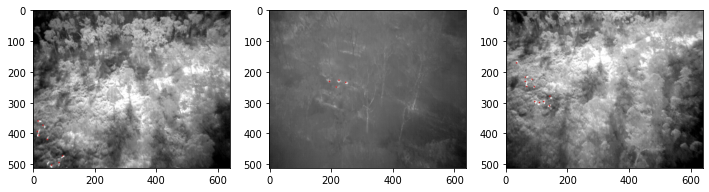

In [632]:
fig = plt.figure(figsize=[12,7])
ax =fig.add_subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(p2pimgs[6], cv2.COLOR_BGR2RGB))
#plt.scatter(x=[0.95078125*640, 0.959375*640], y=[0.4111328125*512, 0.5*512], c='r', s=1)
ax =fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(p2pimgs[7], cv2.COLOR_BGR2RGB))
#plt.scatter(x=[0.94296875*640], y=[0.5634765625*512], c='r', s=1)

ax =fig.add_subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(p2pimgs[8], cv2.COLOR_BGR2RGB))
print(imgout[1][0])

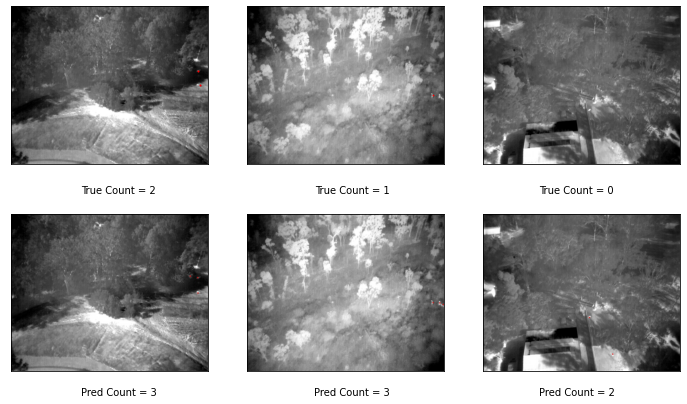

In [382]:
fig = plt.figure(figsize=[12,7])
ax =fig.add_subplot(2, 3, 1)
plt.setp(ax, xticks=[], yticks=[])
plt.scatter(x=[0.95078125*640, 0.959375*640], y=[0.4111328125*512, 0.5*512], c='r', s=1)
plt.imshow(p2pimgs[3], cmap='gray')

ax=fig.add_subplot(2, 3, 2)
plt.setp(ax, xticks=[], yticks=[])
plt.imshow(p2pimgs[4], cmap='gray')
plt.scatter(x=[0.94296875*640], y=[0.5634765625*512], c='r', s=.5)

ax=fig.add_subplot(2, 3, 3)
plt.setp(ax, xticks=[], yticks=[])
plt.imshow(p2pimgs[5], cmap='gray')

ax=fig.add_subplot(2, 3, 4)
plt.setp(ax, xticks=[], yticks=[])
plt.imshow(cv2.cvtColor(p2pimgs[0], cv2.COLOR_BGR2RGB))

ax=fig.add_subplot(2, 3, 5)
plt.setp(ax, xticks=[], yticks=[])
plt.imshow(cv2.cvtColor(p2pimgs[1], cv2.COLOR_BGR2RGB))

ax=fig.add_subplot(2, 3, 6)
plt.setp(ax, xticks=[], yticks=[])
plt.imshow(cv2.cvtColor(p2pimgs[2], cv2.COLOR_BGR2RGB))

fig.text(0.25, 0.5, 'True Count = 2'.format(p2poutputs[3]), ha='center', va='center')
fig.text(0.52, 0.5, 'True Count = 1'.format(p2poutputs[4]), ha='center', va='center')
fig.text(0.78, 0.5, 'True Count = 0'.format(p2poutputs[5]), ha='center', va='center')
fig.text(0.25, 0.1, 'Pred Count = {}'.format(p2poutputs[0]), ha='center', va='center')
fig.text(0.52, 0.1, 'Pred Count = {}'.format(p2poutputs[1]), ha='center', va='center')
fig.text(0.78, 0.1, 'Pred Count = {}'.format(p2poutputs[2]), ha='center', va='center')

plt.show()
fig.savefig('../../../notebook_test2.png', dpi=350)